![](https://i.loli.net/2018/05/07/5af0400fe9c67.png)

# 机器学习多层感知机分析实战：鸡尾酒分类和手写数字识别

算法： 
- MLP 

目录： 
- Step1: 自制数据集比较MLP与SVM
- Step2: 鸡尾酒数据集分类
- Step3: 手写数字识别
- Step4: 总结

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from process.process import load_data, create_data, plot_boundary
from sklearn.svm import SVC

In [2]:
# A bit of setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.cmap'] = 'gray'


## Step1: 自制数据集比较MLP与SVM

先随机生成一个toy data

(-1, 1)

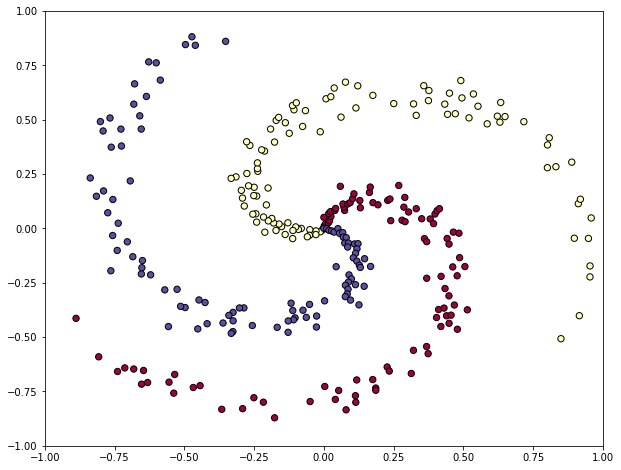

In [3]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral

0.5166666666666667


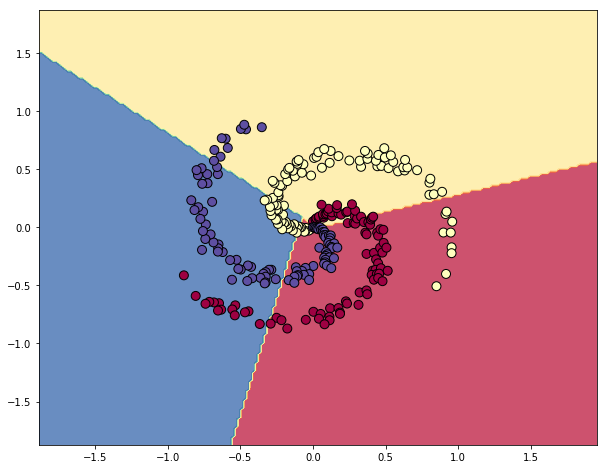

True

In [4]:
svc = SVC(kernel='linear')
svc.fit(X, y)

predict = svc.predict(X)
print(np.mean(predict == y))
plot_boundary(X, y, svc)

0.87


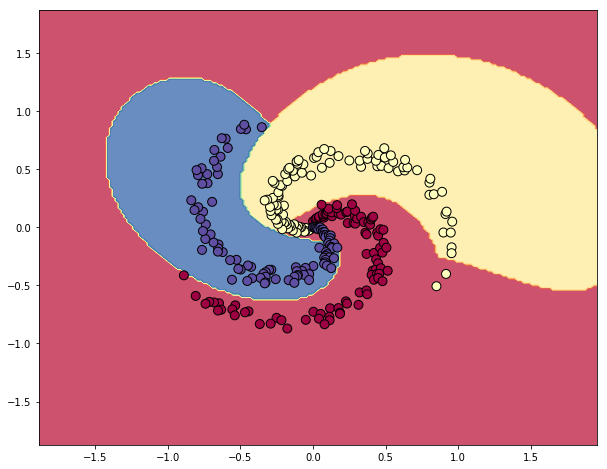

True

In [5]:
svc = SVC(kernel='rbf')
svc.fit(X, y)

predict = svc.predict(X)
print(np.mean(predict == y))
plot_boundary(X, y, svc)

0.99


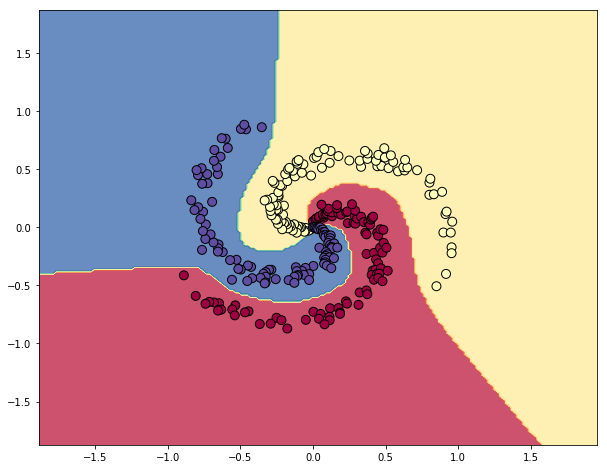

True

In [6]:
nn = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
nn.fit(X, y)

predict = nn.predict(X)
print(np.mean(predict == y))

plot_boundary(X, y, nn)

## Step2: 鸡尾酒数据集分类

In [7]:
from sklearn.datasets import load_wine

### 先做数据可视化

In [8]:
X = load_wine().data
y = load_wine().target

In [9]:
load_wine().feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
wine_df = pd.DataFrame(X)
wine_df.columns = load_wine().feature_names
wine_df['label'] = y

In [12]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
wine_df['label'].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

In [14]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


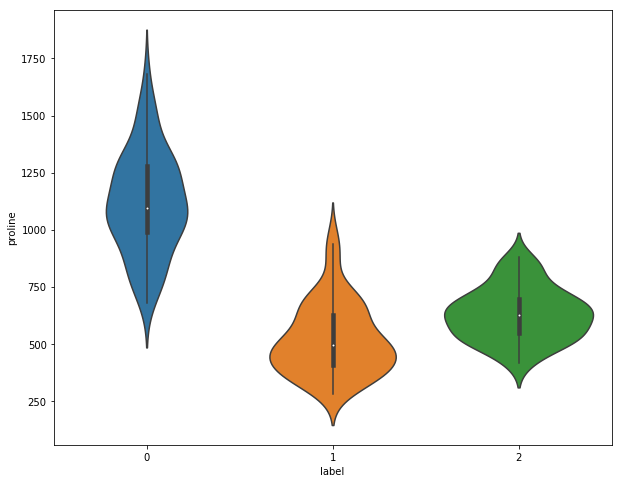

In [15]:
ax = sns.violinplot(x="label", y="proline", data=wine_df)

C:\Users\wei.mo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\wei.mo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\wei.mo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


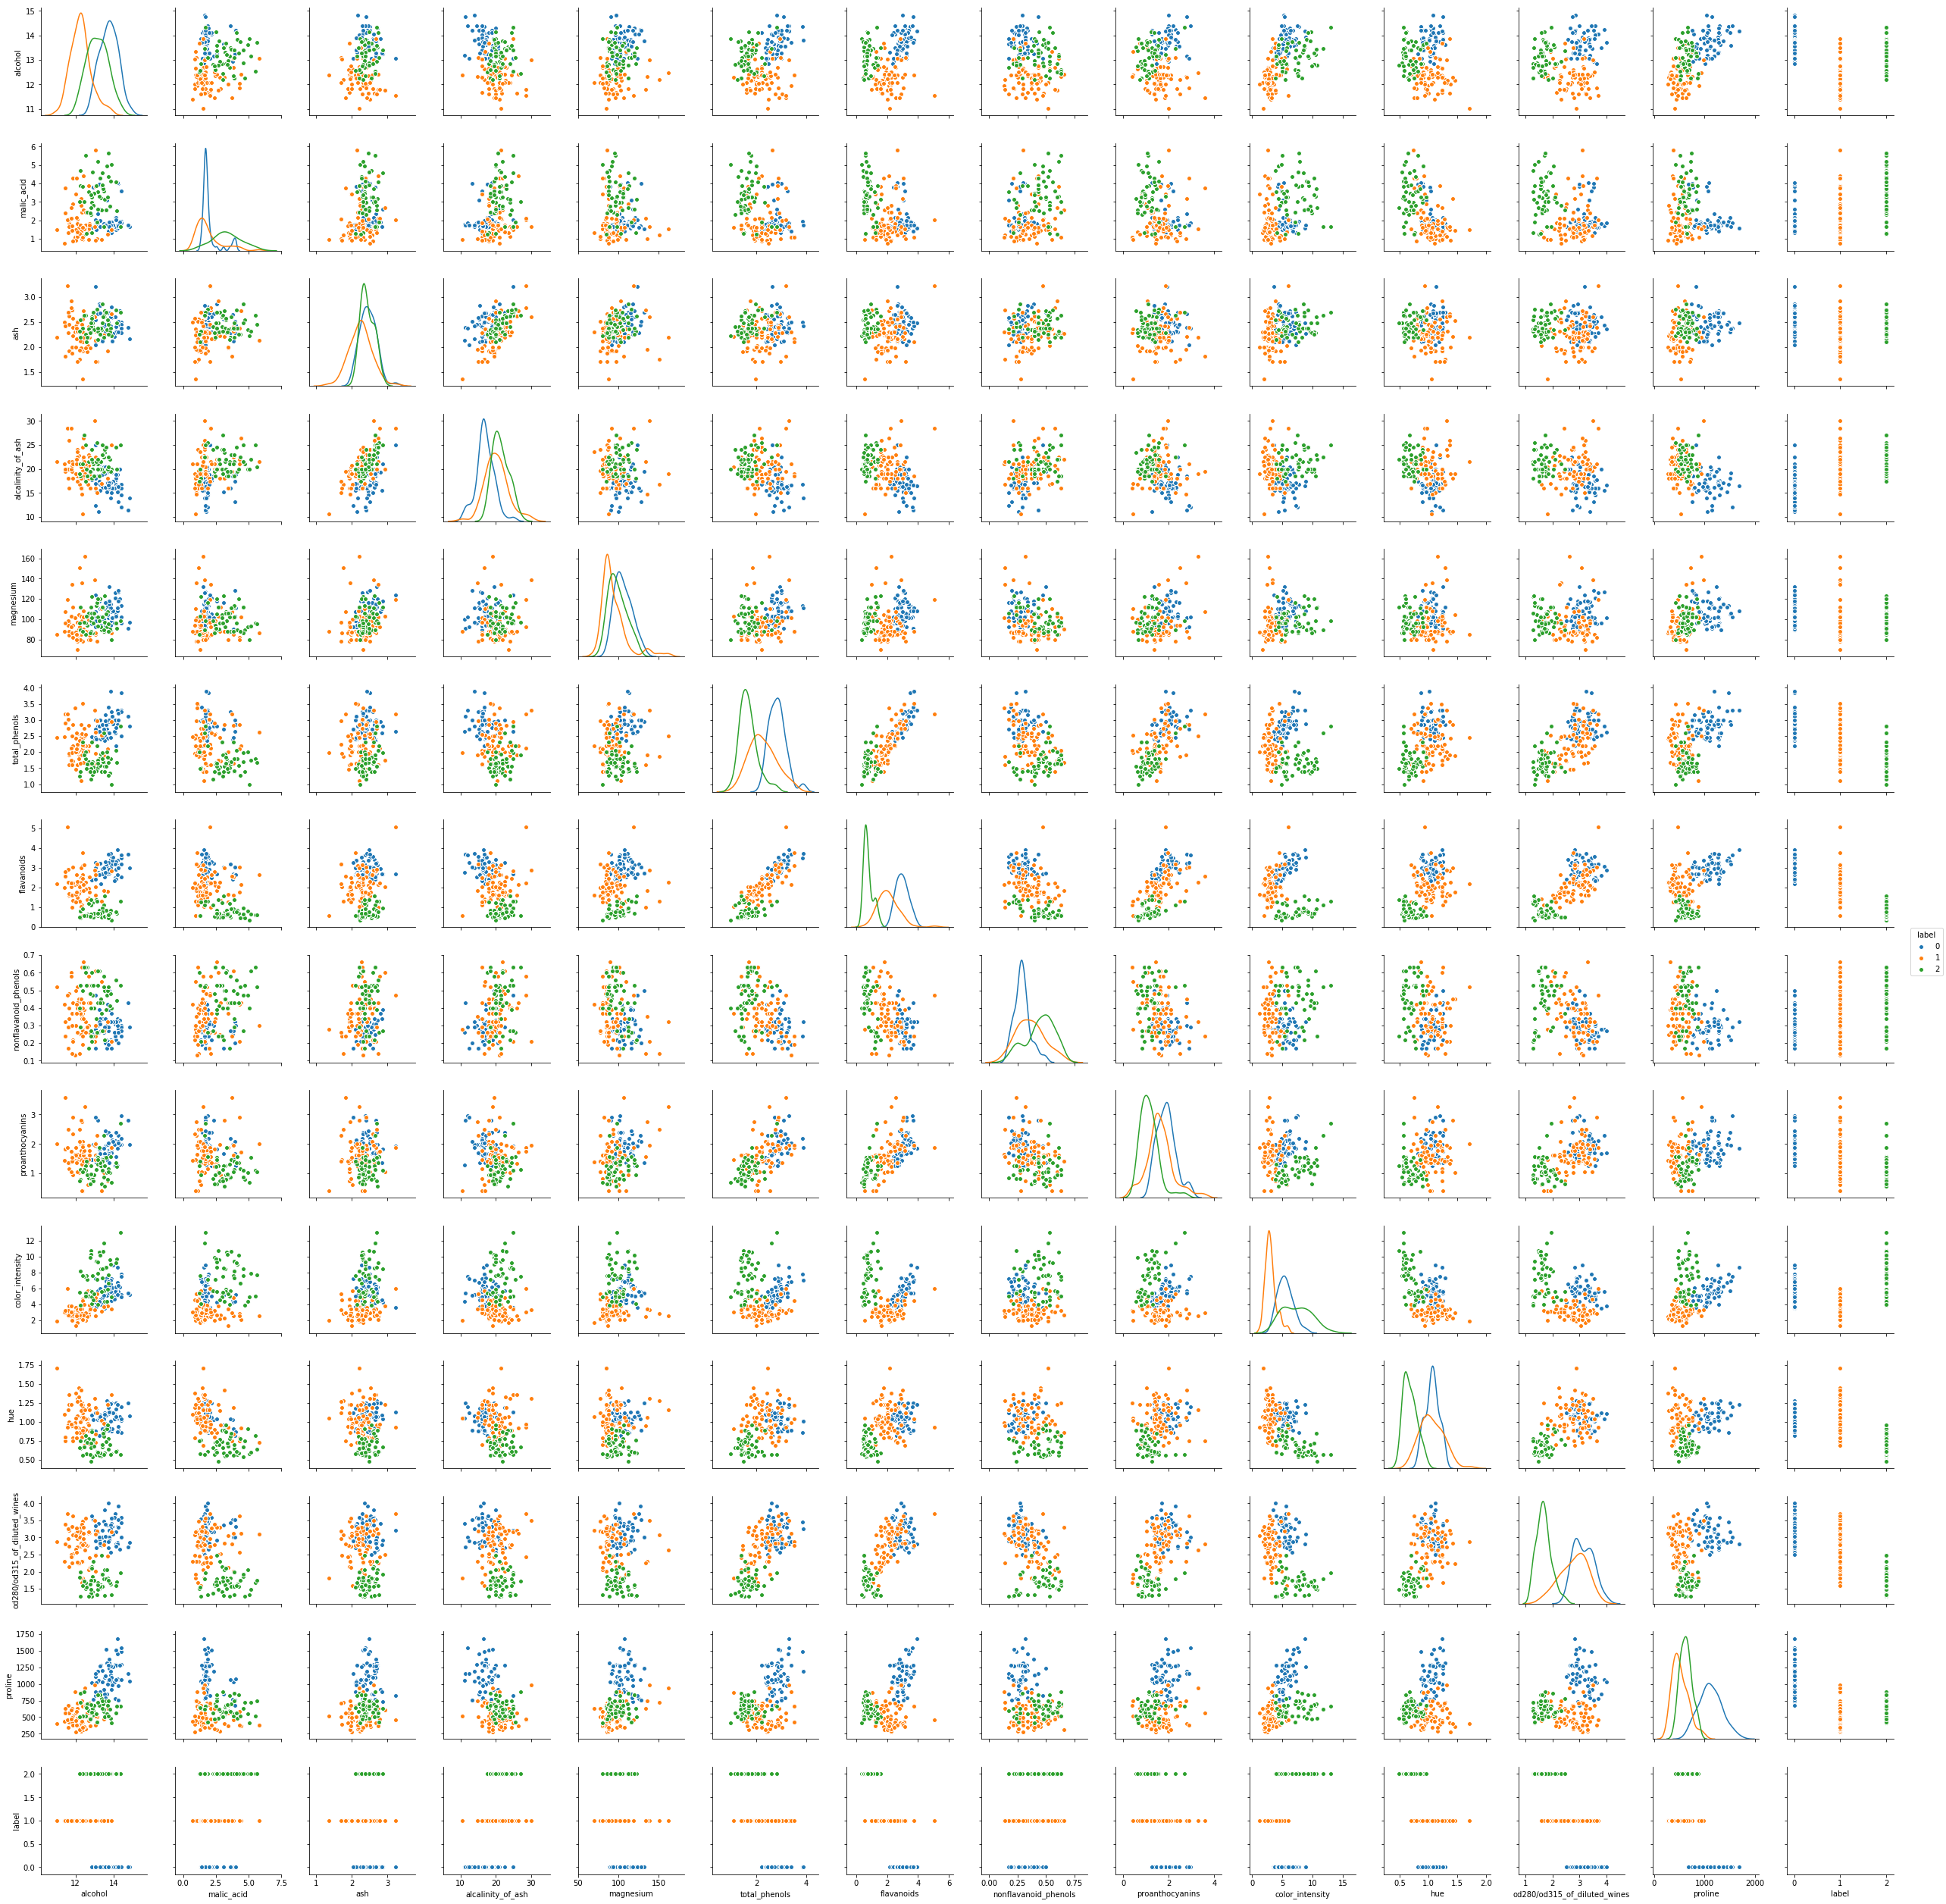

In [16]:
sns.pairplot(wine_df, hue='label', diag_kind='kde')

### 用svm做分类

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(119, 13) (59, 13) (119,) (59,)


In [21]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

predict = svc.predict(X_test)
print(np.mean(predict == y_test))

0.9830508474576272


### 用MLP分类

In [29]:
nn = MLPClassifier(hidden_layer_sizes=(1000), verbose=True, random_state=24, learning_rate_init=1e-4, solver='lbfgs')
nn.fit(X_train, y_train)
predict = nn.predict(X_test)
print(np.mean(predict == y_test))

0.9661016949152542


## Step3: 手写数字识别

In [30]:
train_data, valid_data, test_data = load_data()
x_train, y_train, x_valid, y_valid, x_test, y_test = create_data(train_data, valid_data, test_data)

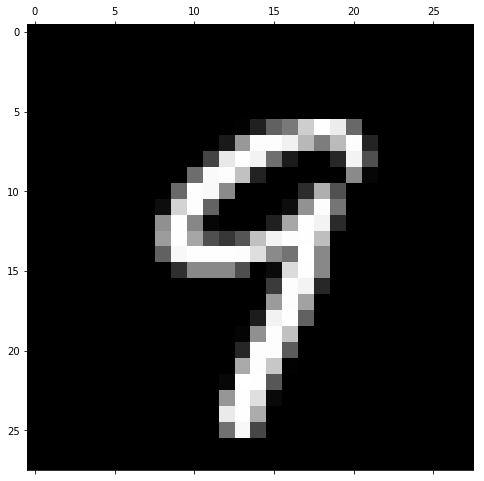

In [31]:
plt.gray()
plt.matshow(x_train[0].reshape(28, 28))
plt.show()

In [32]:
nn = MLPClassifier(hidden_layer_sizes=(1000, 100), verbose=True, tol=1e-5, random_state=24)
nn.fit(x_train, y_train)
predict = nn.predict(x_test)

Iteration 1, loss = 0.63984934
Iteration 2, loss = 0.22975285
Iteration 3, loss = 0.14892403
Iteration 4, loss = 0.09754571
Iteration 5, loss = 0.06771599
Iteration 6, loss = 0.04302226
Iteration 7, loss = 0.03053619
Iteration 8, loss = 0.02100783
Iteration 9, loss = 0.01356732
Iteration 10, loss = 0.00774067
Iteration 11, loss = 0.00512937
Iteration 12, loss = 0.00394116
Iteration 13, loss = 0.00307589
Iteration 14, loss = 0.00262818
Iteration 15, loss = 0.00226605
Iteration 16, loss = 0.00199165
Iteration 17, loss = 0.00176456
Iteration 18, loss = 0.00160760
Iteration 19, loss = 0.00148000
Iteration 20, loss = 0.00135420
Iteration 21, loss = 0.00124121
Iteration 22, loss = 0.00115958
Iteration 23, loss = 0.00107329
Iteration 24, loss = 0.00100432
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [33]:
np.mean(predict == y_test)

0.97

## Step4: 总结

MLP优点：
- 模型学习能力强，可以学习到复杂的模式
- <font color='red'>模型能够学习到数据的层次结构</font>
- 训练得当的模型拥有很强的泛化能力和鲁棒性

MLP缺点：
- 需要大量数据进行训练，小数据集上表现一般
- 深度网络训练过程缓慢，需要许多计算资源（GPU等）
- 对参数变化敏感，需要花费很多精力调参

深层神经网络（深度学习）在语音、图像、自然语言处理方面有着得天独厚的优势